In [42]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys

In [43]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
n_qty=2 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
repet = 3 * 2 #CAMBIAR EL PRIMER NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
values = [2, 10, 20, 40]
dist_names = ['null', 'BestFit', 'WorstFit']

In [44]:
def speedUp(arr, seq, df):
    numP = df.loc[arr.index[0]].NP
    return seq[( seq.NP == numP )]['EX'] / arr.mean()

In [61]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Groups'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Groups'])['TE']

#group
grouped_aggG = group.agg(['mean'])
grouped_aggG.rename(columns={'mean':'TE',}, inplace=True)

In [62]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

if(n_qty == 1):
    groupM = dfM.groupby(['%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']
else:
    groupM = dfM.groupby(['Dist', '%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']

#group
grouped_aggM = groupM.agg(['mean'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

In [63]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'NP', 'NS'])['Ti', 'To']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'NP', 'NS'])['Ti', 'To']

#group
grouped_aggL = groupL.agg(['mean', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2'], axis='columns')

grouped_aggL['Iters'] = np.ceil(grouped_aggL['Iters']/6) # TODO Cambiar a repeticiones realizadas
grouped_aggL['Iters2'] = np.ceil(grouped_aggL['Iters2']/6)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  if sys.path[0] == '':


In [64]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG.to_excel("resultG.xlsx") 

In [65]:
dfG

N  %Async Groups Dist  Matrix  CommTam  Time Iters        TE  \
0    2000000000     0.0  20,40  2,2  100000        0   0.2  1,10  3.325915   
1    2000000000     0.0  20,40  2,2  100000        0   0.2  1,10  3.661673   
2    2000000000     0.0  20,40  2,2  100000        0   0.2  1,10  3.647241   
3    2000000000    75.0  10,40  1,1  100000        0   0.2  1,10  2.710496   
4    2000000000    75.0  10,40  1,1  100000        0   0.2  1,10  2.785736   
..          ...     ...    ...  ...     ...      ...   ...   ...       ...   
475  2000000000    50.0  10,10  2,2  100000        0   0.2  1,10  1.292079   
476  2000000000    50.0  10,10  2,2  100000        0   0.2  1,10  1.683571   
477  2000000000    50.0  40,20  1,1  100000        0   0.2  1,10  3.107688   
478  2000000000    50.0  40,20  1,1  100000        0   0.2  1,10  3.169551   
479  2000000000    50.0  40,20  1,1  100000        0   0.2  1,10  3.442101   

              S  
0    2000000000  
1    2000000000  
2    2000000000  
3     500000000  
4     500000000  
..          ...  
475  1000000000  
476  1000000000  
477  1000000000  
478  1000000000  
479  1000000000  

[480 rows x 10 columns]

In [66]:
grouped_aggG

TE
Dist %Async Groups          
1,1  0.0    10,10   7.238413
            10,2    7.495134
            10,20   1.052943
            10,40   2.412291
            2,10    1.812608
...                      ...
2,2  100.0  20,40   3.978562
            40,10   3.869905
            40,2    4.056287
            40,20   4.384910
            40,40   3.143114

[160 rows x 1 columns]

In [67]:
dfM

N  %Async  NP  NS Dist  Matrix  CommTam  Time Iters        TC  \
0    2000000000     0.0  20  40  2,2  100000        0   0.2  1,10  1.523284   
1    2000000000     0.0  20  40  2,2  100000        0   0.2  1,10  1.395780   
2    2000000000     0.0  20  40  2,2  100000        0   0.2  1,10  1.515433   
3    2000000000    75.0  10  40  1,1  100000        0   0.2  1,10  1.331821   
4    2000000000    75.0  10  40  1,1  100000        0   0.2  1,10  1.338515   
..          ...     ...  ..  ..  ...     ...      ...   ...   ...       ...   
475  2000000000    50.0  10  10  2,2  100000        0   0.2  1,10  0.573135   
476  2000000000    50.0  10  10  2,2  100000        0   0.2  1,10  0.568495   
477  2000000000    50.0  40  20  1,1  100000        0   0.2  1,10  1.171373   
478  2000000000    50.0  40  20  1,1  100000        0   0.2  1,10  1.227744   
479  2000000000    50.0  40  20  1,1  100000        0   0.2  1,10  1.101387   

           TS        TA           S        TR  
0    1.571982  0.000000  2000000000  3.095266  
1    2.067917  0.000000  2000000000  3.463697  
2    1.939858  0.000000  2000000000  3.455291  
3    0.217988  1.279915   500000000  2.829724  
4    0.268872  1.359864   500000000  2.967251  
..        ...       ...         ...       ...  
475  0.091322  0.679278  1000000000  1.343735  
476  0.096622  1.075340  1000000000  1.740457  
477  0.557700  1.843437  1000000000  3.572510  
478  0.634888  1.881406  1000000000  3.744038  
479  0.695218  2.296932  1000000000  4.093537  

[480 rows x 14 columns]

In [68]:
grouped_aggM

TC        TS        TA        TR
Dist %Async NP NS                                        
1,1  0.0    2  2   0.246172  0.658124  0.000000  0.904296
               10  0.372526  0.846183  0.000000  1.218709
               20  0.463237  0.975418  0.000000  1.438655
               40  5.897614  1.306502  0.000000  7.204116
            10 2   4.623390  0.823443  0.000000  5.446832
...                     ...       ...       ...       ...
2,2  100.0  20 40  1.464316  0.000000  2.380671  3.844987
            40 2   0.482502  0.000000  3.510194  3.992695
               10  1.026574  0.000000  2.781301  3.807875
               20  1.397894  0.000000  2.814464  4.212358
               40  1.445946  0.000000  1.597486  3.043431

[160 rows x 4 columns]

In [69]:
dfL

N  %Async  NP  N_par  NS  Dist  Compute_tam  Comm_tam  Time  \
0      2000000000     0.0  40     20   0     2       100000         0   0.2   
1      2000000000     0.0  40     20   0     2       100000         0   0.2   
2      2000000000     0.0  40     20   0     2       100000         0   0.2   
3      2000000000     0.0  40     20   0     2       100000         0   0.2   
4      2000000000     0.0  40     20   0     2       100000         0   0.2   
...           ...     ...  ..    ...  ..   ...          ...       ...   ...   
14951  2000000000    50.0  40      0  20     1       100000         0   0.2   
14952  2000000000    50.0  40      0  20     1       100000         0   0.2   
14953  2000000000    50.0  40      0  20     1       100000         0   0.2   
14954  2000000000    50.0  40      0  20     1       100000         0   0.2   
14955  2000000000    50.0  40      0  20     1       100000         0   0.2   

       Iters        Ti   Tt    To  
0         10  0.009826  0.0  11.0  
1         10  0.025812  0.0  11.0  
2         10  0.009819  0.0  11.0  
3         10  0.011071  0.0  11.0  
4         10  0.009815  0.0  11.0  
...      ...       ...  ...   ...  
14951      1  0.025818  1.0  11.0  
14952      1  0.009812  1.0  11.0  
14953      1  0.025813  1.0  11.0  
14954      1  0.025810  1.0  11.0  
14955      1  0.009820  1.0  11.0  

[14956 rows x 13 columns]

In [70]:
grouped_aggL

Ti  Iters     To  Iters2
Tt  Dist %Async NP NS                                
0.0 1    0.0    2  2   0.199702    1.0  224.0     1.0
                   10  0.199709    1.0  224.0     1.0
                   20  0.199704    1.0  224.0     1.0
                   40  0.199695    1.0  224.0     1.0
                10 2   0.039240    1.0   44.0     1.0
...                         ...    ...    ...     ...
1.0 2    100.0  20 40  0.057025   21.0   22.0    21.0
                40 2   0.021417   81.0   11.0    81.0
                   10  0.021047   66.0   11.0    66.0
                   20  0.024609   54.0   11.0    54.0
                   40  0.030871   26.0   11.0    26.0

[288 rows x 4 columns]

In [71]:
print("TIEMPO EJECUCCION")
sinc = 0
asinc = 0
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                group = str(numP) + "," + str(numC)
                v1 = dfG[(dfG["%Async"] == 0.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                v2 = dfG[(dfG["%Async"] == 100.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggG['TE'].loc[(dist_v, 0.0, group)] - grouped_aggG['TE'].loc[(dist_v, 100.0, group)]
                if diff > 0:
                    mejor = "Asíncrono"
                    asinc+=1
                else:
                    mejor = "Síncrono"
                    sinc+=1
                    
                if res[1] < p_value:
                    print("EX numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)
print("SINC: " + str(sinc) + " || ASINC: " + str(asinc))

TIEMPO EJECUCCION
Distribución BestFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.675 Asíncrono
EX numC= 20 p = 0.012 Diff = 0.139 Síncrono
Para  10  padres
Para  20  padres
EX numC= 2 p = 0.0 Diff = 1.915 Asíncrono
EX numC= 20 p = 0.013 Diff = 0.705 Síncrono
EX numC= 40 p = 0.014 Diff = 0.8 Síncrono
Para  40  padres
EX numC= 20 p = 0.039 Diff = 0.734 Síncrono
EX numC= 40 p = 0.005 Diff = 0.368 Síncrono
Distribución WorstFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.691 Asíncrono
Para  10  padres
EX numC= 2 p = 0.0 Diff = 1.894 Asíncrono
Para  20  padres
EX numC= 10 p = 0.022 Diff = 0.513 Síncrono
EX numC= 40 p = 0.021 Diff = 0.434 Síncrono
Para  40  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


EX numC= 20 p = 0.029 Diff = 0.762 Síncrono
EX numC= 40 p = 0.002 Diff = 0.302 Síncrono
SINC: 22 || ASINC: 10


In [72]:
print("TIEMPO MALLEABILITY")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                v1 = dfM[(dfM["%Async"] == 0.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TS']
                v2 = dfM[(dfM["%Async"] == 100.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TA']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggM['TS'].loc[(dist_v, 0.0, numP, numC)] - grouped_aggM['TA'].loc[(dist_v, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    print("TR numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)

TIEMPO MALLEABILITY
Distribución BestFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 0.143 Síncrono
Para  10  padres
TR numC= 10 p = 0.0 Diff = 0.05 Síncrono
TR numC= 20 p = 0.03 Diff = 0.087 Síncrono
Para  20  padres
TR numC= 10 p = 0.02 Diff = 0.531 Síncrono
TR numC= 20 p = 0.005 Diff = 0.839 Síncrono
TR numC= 40 p = 0.007 Diff = 0.877 Síncrono
Para  40  padres
TR numC= 2 p = 0.0 Diff = 2.23 Síncrono
TR numC= 10 p = 0.034 Diff = 0.791 Síncrono
TR numC= 20 p = 0.005 Diff = 1.086 Síncrono
TR numC= 40 p = 0.0 Diff = 0.453 Síncrono
Distribución WorstFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 0.13 Síncrono
Para  10  padres
TR numC= 2 p = 0.011 Diff = 0.116 Síncrono
TR numC= 10 p = 0.035 Diff = 0.929 Síncrono


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


TR numC= 20 p = 0.02 Diff = 0.74 Síncrono
Para  20  padres
TR numC= 2 p = 0.008 Diff = 3.713 Síncrono
TR numC= 10 p = 0.001 Diff = 1.051 Síncrono
TR numC= 20 p = 0.028 Diff = 0.398 Síncrono
TR numC= 40 p = 0.037 Diff = 0.521 Síncrono
Para  40  padres
TR numC= 10 p = 0.04 Diff = 1.07 Síncrono
TR numC= 20 p = 0.001 Diff = 0.944 Síncrono
TR numC= 40 p = 0.001 Diff = 0.443 Síncrono


In [73]:
print("TIEMPO Iters")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                #exp = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == 1)][(dfL["%Async"] == 0.0)][(dfL.NP == numP)][(dfL.NS == numC)]
                #TimeOp = exp['Ti'] 
                #print(TimeOp)
                v1 = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                v2 = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                res = stats.ttest_ind(v1, v2, equal_var = False)
                diff = grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)] - grouped_aggL['Ti'].loc[(1, dist, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    #and abs(diff) > grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)]
                    print("Ti numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,4)), mejor)

TIEMPO Iters
Distribución BestFit -------------------------
Para  2  padres
Ti numC= 40 p = 0.02 Diff = 0.0421 Síncrono
Para  10  padres
Ti numC= 10 p = 0.012 Diff = 0.0 Síncrono
Ti numC= 20 p = 0.02 Diff = 0.0 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.023 Síncrono
Para  20  padres
Ti numC= 2 p = 0.011 Diff = 0.0009 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.0037 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.0139 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.0158 Síncrono
Para  40  padres
Ti numC= 2 p = 0.0 Diff = 0.0089 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.0099 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.0125 Síncrono


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Ti numC= 40 p = 0.0 Diff = 0.0208 Síncrono
Distribución WorstFit -------------------------
Para  2  padres
Ti numC= 20 p = 0.048 Diff = 0.0463 Síncrono
Ti numC= 40 p = 0.003 Diff = 0.0688 Síncrono
Para  10  padres
Ti numC= 10 p = 0.0 Diff = 0.0218 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.0373 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.0409 Síncrono
Para  20  padres
Ti numC= 2 p = 0.0 Diff = 0.0165 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.0265 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.041 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.0374 Síncrono
Para  40  padres
Ti numC= 2 p = 0.0 Diff = 0.0116 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.0112 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.0148 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.0211 Síncrono


In [74]:
auxIter = pd.DataFrame(dfM['Iters'].str.split(',',1).tolist(),columns = ['Iters0','Iters1'])
auxIter['Iters1'] = pd.to_numeric(auxIter['Iters1'], errors='coerce')
iters = auxIter['Iters1'].mean()
print(iters)


10.0


In [75]:
#iters = dfM['Iters'].mean()
resultados = [0,0]
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                Titer = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL.NP == numC)]['Ti'].mean() #Tiempo por iteracion
                i=0
                for adr in [0.0, 100.0]:
                
                    auxExp = dfM[(dfM["Dist"] == dist_v)][(dfM["%Async"] == adr)][(dfM.NP == numP)][(dfM.NS == numC)]
                    Tr = auxExp['TS'].mean() + auxExp['TA'].mean() #Tiempo de redistribucion
                    M_it = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == adr)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti'].count()/3 #Iteraciones asincronas
                    #No se presupone una diferencia temporal entre iteraciones sincronas y asincronas
                    if(M_it > iters):
                        M_it = iters
                    resultados[i] = (iters - M_it) * Titer + Tr
                    i+=1
                    #print(M_it)
                    #print(Titer)
                    #print(iters)
                    #print((iters - M_it) * Titer)
                    #print(Tr)
                    #print("End")

                if resultados[0] > resultados[1]:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                diff = abs(round(resultados[0] - resultados[1], 3))
                print("NC="+ str(numC) + " Es mejor " + mejor + " con una diff de "+  str(diff))
                #TODO Comprobar

Distribución BestFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.659
NC=10 Es mejor Asíncrono con una diff de 0.124
NC=20 Es mejor Asíncrono con una diff de 0.039
NC=40 Es mejor Síncrono con una diff de 0.077
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 1.996
NC=10 Es mejor Asíncrono con una diff de 0.147
NC=20 Es mejor Asíncrono con una diff de 0.097


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


NC=40 Es mejor Síncrono con una diff de 0.16
Para  20  padres
NC=2 Es mejor Asíncrono con una diff de 1.938
NC=10 Es mejor Síncrono con una diff de 0.137
NC=20 Es mejor Síncrono con una diff de 0.642
NC=40 Es mejor Síncrono con una diff de 0.775
Para  40  padres
NC=2 Es mejor Síncrono con una diff de 0.225
NC=10 Es mejor Síncrono con una diff de 0.397
NC=20 Es mejor Síncrono con una diff de 0.889
NC=40 Es mejor Síncrono con una diff de 0.351
Distribución WorstFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.671
NC=10 Es mejor Asíncrono con una diff de 0.132
NC=20 Es mejor Síncrono con una diff de 0.185
NC=40 Es mejor Síncrono con una diff de 0.455
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 1.888
NC=10 Es mejor Síncrono con una diff de 0.536
NC=20 Es mejor Síncrono con una diff de 0.533
NC=40 Es mejor Síncrono con una diff de 0.176
Para  20  padres
NC=2 Es mejor Síncrono con una diff de 1.71
NC=10 Es mejor Síncrono con una diff de 0.6

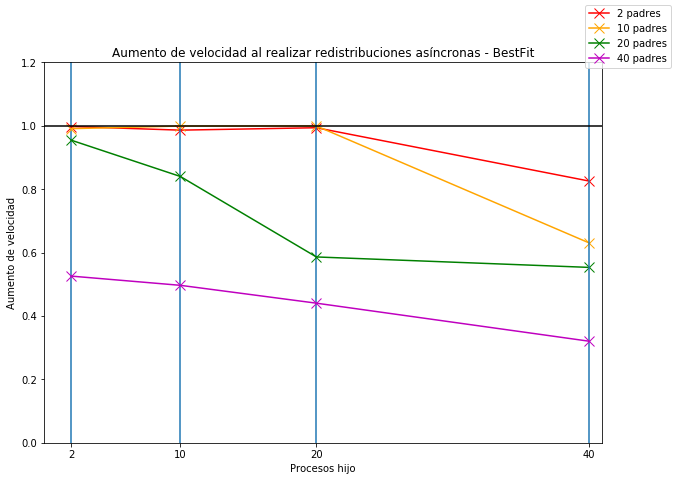

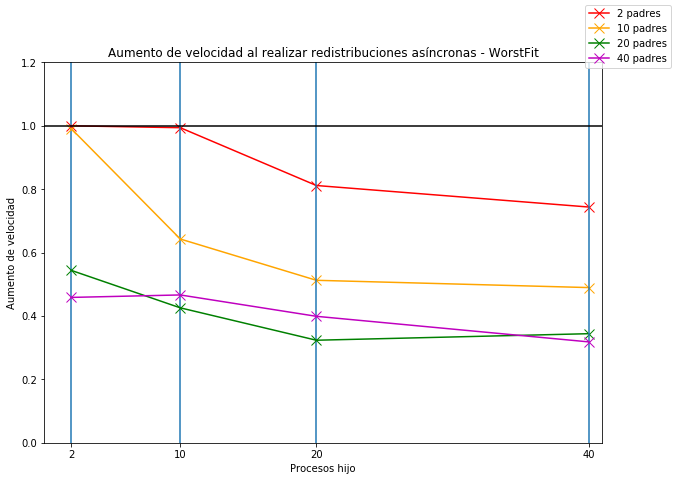

In [76]:
for dist in [1,2]:
    v1 = grouped_aggL.loc[(0,dist,100.0,slice(None))]
    v2 = grouped_aggL.loc[(1,dist,100.0,slice(None))]
    aux_aggL = v1['Ti'].values / v2['Ti'].values

    colors = ['r', 'orange', 'g', 'm', 'y']
    markers = ['+', 'x', '1', '2', 'X']

    f=plt.figure(figsize=(10, 7))
    ax1 = f.add_subplot(111)
    plt.xlim(0, max(values)+1)
    plt.ylim(0, 1.2)
    plt.xticks(values)
    ax1.set_ylabel('Aumento de velocidad')
    ax1.set_xlabel('Procesos hijo')
    ax1.set_title("Aumento de velocidad al realizar redistribuciones asíncronas - " + dist_names[dist])


    for i in range(len(values)):
        numP = values[i]
        c = colors[i]
    
        mini = i * len(values)
        maxi = (i+1) * len(values)
        array_values = aux_aggL[mini:maxi]
        indexes = np.arange(len(values))
        aux_j=0
        for j in range(len(values)):
            indexes[aux_j] = values[j]
            aux_j+=1
    
        x = indexes
        y = array_values
        label = str(numP) + ' padres'
        ax1.axvline(numP)
        plt.plot(x, y, color=colors[i], label=label, marker=markers[1], markersize=10)
    
    ax1.axhline(1, color='k')
    f.legend()
    #f.tight_layout()
    f.savefig("Images/"+"Iters"+ dist_names[dist] +"_SpeedUp", format="png")